# Model plots

### Prepare imports

In [ ]:
import pandas as pd
import numpy as np
import warnings
import random
import matplotlib.pyplot as plt
import fastparquet

### Read parquet

In [2]:
df_pred = pd.read_parquet('df_pred_3_enc_models.parquet')

In [ ]:
# shape
print(df_pred.shape)

# columns
print(df_pred.columns)

Index(['y_test', 'y_pred_lin', 'errors_lin', 'y_pred_tree', 'errors_tree',
       'y_pred_xgb', 'errors_xgb'],
      dtype='object')
(6884408, 7)


### Sample 1% of cleaned data

In [84]:
df_pred_120 = df_pred[df_pred["y_test"] > 120] # all greater than 2 mins

df_pred_cleaned = df_pred_120.sample(frac=0.01, random_state=14)

print(len(df_pred))
print(len(df_pred_cleaned))

6884408
45873


In [65]:
selected_indices = df_pred_cleaned.index

y_test = df_pred_120.loc[selected_indices, "y_test"]

y_pred_lin = df_pred_120.loc[selected_indices, "y_pred_lin"]
errors_lin = df_pred_120.loc[selected_indices, "errors_lin"]

y_pred_tree = df_pred_120.loc[selected_indices, "y_pred_tree"]
errors_tree = df_pred_120.loc[selected_indices, "errors_tree"]

y_pred_xgb = df_pred_120.loc[selected_indices, "y_pred_xgb"]
errors_xgb = df_pred_120.loc[selected_indices, "errors_xgb"]

### Common to all models

In [66]:
style_map = {
    "Within 1 minute": {"color": "green", "marker": "o"},
    "Within 3 minutes": {"color": "blue", "marker": "s"},
    "Within 5 minutes": {"color": "orange", "marker": "^"},
    "More than 5 minutes": {"color": "red", "marker": "x"}
}

# Custom order
plot_order = ["More than 5 minutes", "Within 5 minutes", "Within 3 minutes", "Within 1 minute"]

### Linear Regression

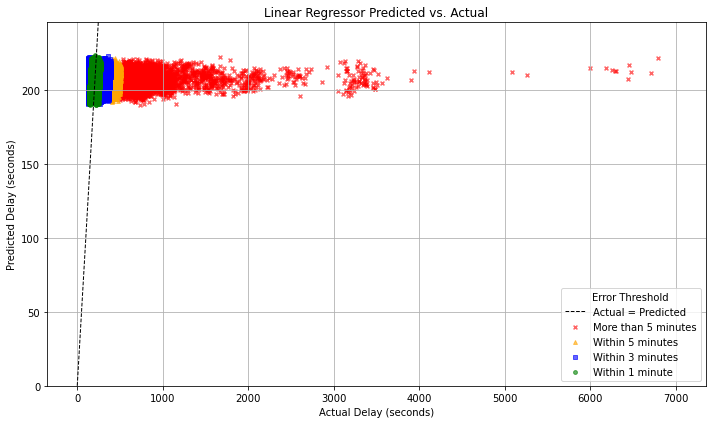

In [83]:
thresholds_lin = {
    "Within 1 minute": errors_lin <= 60,
    "Within 3 minutes": (errors_lin > 60) & (errors_lin <= 180),
    "Within 5 minutes": (errors_lin > 180) & (errors_lin <= 300),
    "More than 5 minutes": errors_lin > 300
}

plt.figure(figsize=(10, 6))

for label in plot_order:
    condition = thresholds_lin[label].reindex(y_test.index, fill_value=False)

    plt.scatter(
        y_test[condition],
        y_pred_lin[condition],
        label=label,
        alpha=0.6,
        s=15,
        color=style_map[label]["color"],
        marker=style_map[label]["marker"]
    )

# Identity line
plt.plot(
    [0, 7000], 
    [0, 7000], 
    'k--', 
    linewidth=1,
    label="Actual = Predicted"
)

plt.xlabel("Actual Delay (seconds)")
plt.ylabel("Predicted Delay (seconds)")
plt.title("Linear Regressor Predicted vs. Actual")
plt.legend(title="Error Threshold")
plt.grid(True)
plt.ylim(0, y_pred_lin.max() * 1.1)
plt.tight_layout()
plt.show()

# Lin Reg plot 1

### Decision Tree Regression

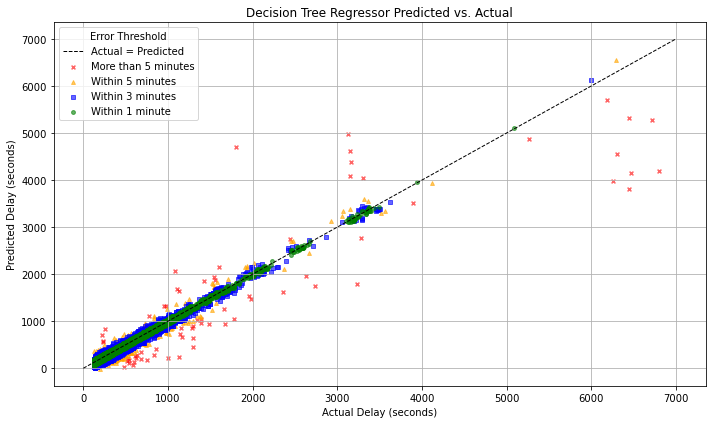

In [81]:
thresholds_tree = {
    "Within 1 minute": errors_tree <= 60,
    "Within 3 minutes": (errors_tree > 60) & (errors_tree <= 180),
    "Within 5 minutes": (errors_tree > 180) & (errors_tree <= 300),
    "More than 5 minutes": errors_tree > 300
}

plt.figure(figsize=(10, 6))

for label in plot_order:
    condition = thresholds_tree[label].reindex(y_test.index, fill_value=False)

    plt.scatter(
        y_test[condition],
        y_pred_tree[condition],
        label=label,
        alpha=0.6,
        s=15,
        color=style_map[label]["color"],
        marker=style_map[label]["marker"]
    )

# Identity line
plt.plot(
    [0, 7000], 
    [0, 7000], 
    'k--', 
    linewidth=1,
    label="Actual = Predicted"
)

plt.xlabel("Actual Delay (seconds)")
plt.ylabel("Predicted Delay (seconds)")
plt.title("Decision Tree Regressor Predicted vs. Actual")
plt.legend(title="Error Threshold")
plt.grid(True)
plt.tight_layout()
plt.show()

### XGB Regression

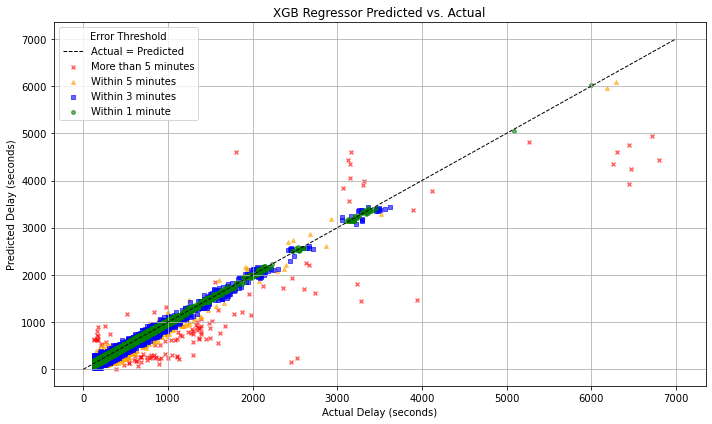

In [82]:
thresholds_xgb = {
    "Within 1 minute": errors_xgb <= 60,
    "Within 3 minutes": (errors_xgb > 60) & (errors_xgb <= 180),
    "Within 5 minutes": (errors_xgb > 180) & (errors_xgb <= 300),
    "More than 5 minutes": errors_xgb > 300
}

plt.figure(figsize=(10, 6))

for label in plot_order:
    condition = thresholds_xgb[label].reindex(y_test.index, fill_value=False)

    plt.scatter(
        y_test[condition],
        y_pred_xgb[condition],
        label=label,
        alpha=0.6,
        s=15,
        color=style_map[label]["color"],
        marker=style_map[label]["marker"]
    )

# Identity line
plt.plot(
    [0, 7000], 
    [0, 7000], 
    'k--', 
    linewidth=1,
    label="Actual = Predicted"
)

plt.xlabel("Actual Delay (seconds)")
plt.ylabel("Predicted Delay (seconds)")
plt.title("XGB Regressor Predicted vs. Actual")
plt.legend(title="Error Threshold")
plt.grid(True)
plt.tight_layout()
plt.show()

## Accuracy

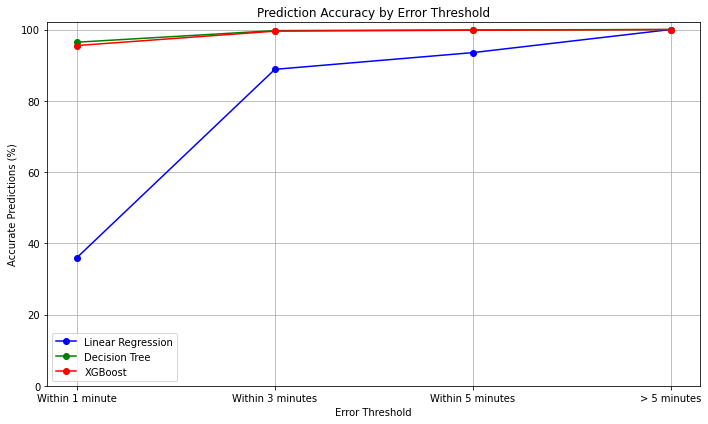

In [80]:
# Data
categories = ["Within 1 minute", "Within 3 minutes", "Within 5 minutes", "> 5 minutes"]

linear_reg_perc = [35.995, 88.826, 93.514, 100.000]
decision_tree_perc = [96.442, 99.698, 99.898, 100.000]
xgb_perc = [95.508, 99.542, 99.805, 100.000]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(categories, linear_reg_perc, marker='o', label='Linear Regression', color='blue')
plt.plot(categories, decision_tree_perc, marker='o', label='Decision Tree', color='green')
plt.plot(categories, xgb_perc, marker='o', label='XGBoost', color='red')

plt.title("Prediction Accuracy by Error Threshold")
plt.xlabel("Error Threshold")
plt.ylabel("Accurate Predictions (%)")
plt.ylim(0, 102)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
